In [1]:
#1.1 기술통계량과 분할표
import numpy as np
import pandas as pd

In [2]:
# 데이터 읽기
survey = pd.read_csv("c:/data/mva/survey.csv")
survey.head(3)

,seq,sex,marriage,age,job,edu,salary
0,1,1,1,21,1,4,60
1,2,1,1,22,5,5,100
2,3,1,1,33,1,4,200


In [3]:
# 평균 구하기
survey["age"].mean()

34.275

In [4]:
# 표준편차 구하기
survey["age"].std()

11.602359397542536

In [6]:
# 범주형 변수로 변환하기
survey["sex"] = survey["sex"].astype("category")
survey["job"] = survey["job"].astype("category")
survey["edu"] = survey["edu"].astype("category")
survey.marriage = survey.marriage.astype("category")

In [7]:
# 연속인 변수의 기술통계량 구하기
survey.iloc[:, 1:].describe()

,age,salary
count,40.000000,40.00000
mean,34.275000,130.22500
std,11.602359,72.19258
min,20.000000,50.00000
25%,24.750000,77.50000
50%,32.000000,105.00000
75%,42.500000,175.00000
max,59.000000,349.00000


In [9]:
# 나이에 대한 평균 및 표준편차
agestat_by_sex = survey.groupby("sex")["age"].describe()
agestat_by_sex

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
1,27.0,33.962963,11.969453,20.0,24.0,32.0,43.0,59.0
2,13.0,34.923077,11.243232,21.0,26.0,33.0,41.0,56.0


In [10]:
agestat_by_sex["mean"]

sex
1    33.962963
2    34.923077
Name: mean, dtype: float64

In [11]:
agestat_by_sex["std"]

sex
1    11.969453
2    11.243232
Name: std, dtype: float64

In [12]:
# (sex, marriage)를 그룹으로 age의 기술통계량 구하기
agestat_by_sex_marriage = survey.groupby(["sex","marriage"])["age"].describe()
agestat_by_sex_marriage

count       mean        std   min    25%   50%    75%   max
sex marriage                                                             
1   1          10.0  24.800000   4.709329  20.0  21.00  23.5  26.75  33.0
    2          15.0  37.866667  11.230486  22.0  31.00  34.0  46.50  56.0
    3           2.0  50.500000  12.020815  42.0  46.25  50.5  54.75  59.0
2   1           5.0  24.400000   3.209361  21.0  22.00  24.0  26.00  29.0
    2           8.0  41.500000   9.071147  27.0  37.50  41.0  46.75  56.0

In [13]:
agestat_by_sex_marriage["mean"]

sex  marriage
1    1           24.800000
     2           37.866667
     3           50.500000
2    1           24.400000
     2           41.500000
Name: mean, dtype: float64

In [14]:
agestat_by_sex_marriage["std"]

sex  marriage
1    1            4.709329
     2           11.230486
     3           12.020815
2    1            3.209361
     2            9.071147
Name: std, dtype: float64

In [15]:
#빈도표 및 분할표(성별, 교육)
sex_freq = pd.crosstab(index=survey.sex, columns='count')
sex_freq

col_0,count
sex,
1,27
2,13


In [16]:
# (sex, edu)의 분할표 구하기
sex_edu_table = pd.crosstab(index=survey.sex, columns=survey.edu)
sex_edu_table

edu,1,2,3,4,5
sex,,,,,
1,1,1,1,13,11
2,0,0,2,6,5


In [18]:
# (sex, edu)의 분할표–카이제곱 검정
from scipy.stats import chi2_contingency
chi2_contingency(sex_edu_table)
# help(chi2_contingency)

(2.578097665816964,
 0.6307078881367414,
 4,
 array([[ 0.675,  0.675,  2.025, 12.825, 10.8  ],
        [ 0.325,  0.325,  0.975,  6.175,  5.2  ]]))

In [1]:
#1.2 단변량 그래프
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 데이터 읽기
survey = pd.read_csv("c:/data/mva/survey.csv")

In [2]:
# 빈도수 구하기
edu_freq = pd.crosstab(index=survey.edu, columns='count')
edu_freq

col_0,count
edu,
1,1
2,1
3,3
4,19
5,16


In [3]:
# 케이스 라벨 지정하기 
edu_freq.index = ["none", "elementary", "middle", "high", "college"]

<BarContainer object of 5 artists>

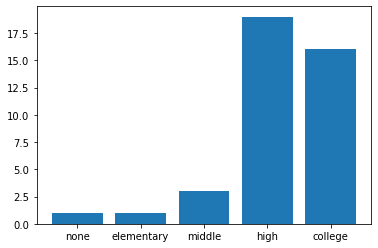

In [4]:
# 막대그림 그리기
plt.bar(edu_freq.index, edu_freq["count"])

([<matplotlib.patches.Wedge at 0x248574078e0>,
 [Text(1.0966090670054351, 0.08630500658402883, 'none'),
  Text(1.0696069115358542, 0.25678990399688945, 'elementary'),
  Text(0.9379041727177269, 0.5747484343594826, 'middle'),
  Text(-0.7143928570788911, 0.8364465588157197, 'high'),
  Text(0.3399186987098807, -1.0461621663333946, 'college')])

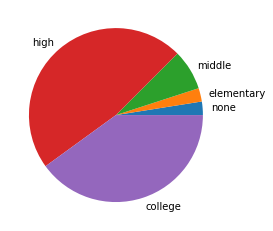

In [5]:
# 원그림 그리기
plt.pie(edu_freq["count"], labels=edu_freq.index)

In [7]:
# (edu, sex) 분할표 구하기
edu_sex_tb = pd.crosstab(index=survey.edu, columns=survey.sex)
edu_sex_tb

sex,1,2
edu,,
1,1,0
2,1,0
3,1,2
4,13,6
5,11,5


In [8]:
# 케이스 및 변수이름 지정하기
edu_sex_tb.index = ["none", "elementary", "middle", "high", "college"]
edu_sex_tb.columns = ["Male", "Female"]
edu_sex_tb

,Male,Female
none,1,0
elementary,1,0
middle,1,2
high,13,6
college,11,5


<AxesSubplot:>

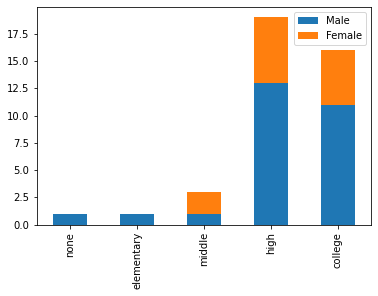

In [9]:
# 겹친 막대그림 그리기
edu_sex_tb.plot.bar(stacked=True)

([<matplotlib.patches.Wedge at 0x248575b0040>,
 [Text(1.0966090670054351, 0.08630500658402883, 'none'),
  Text(1.0696069115358542, 0.25678990399688945, 'elementary'),
  Text(0.9379041727177269, 0.5747484343594826, 'middle'),
  Text(-0.7143928570788911, 0.8364465588157197, 'high'),
  Text(0.3399186987098807, -1.0461621663333946, 'college')])

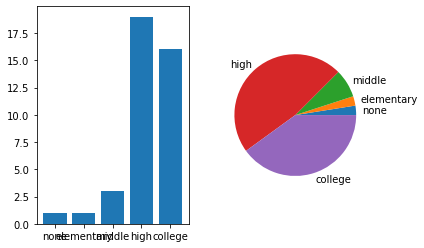

In [10]:
# 한 화면에 여러 개의 그림 그리기
plt.figure()
plt.subplot(121)
plt.bar(edu_freq.index, edu_freq["count"])
plt.subplot(122)
plt.pie(edu_freq["count"], labels=edu_freq.index) 

(array([10., 10.,  6.,  3.,  2.,  5.,  2.,  0.,  1.,  1.]),
 array([ 50. ,  79.9, 109.8, 139.7, 169.6, 199.5, 229.4, 259.3, 289.2,
        319.1, 349. ]),
 <BarContainer object of 10 artists>)

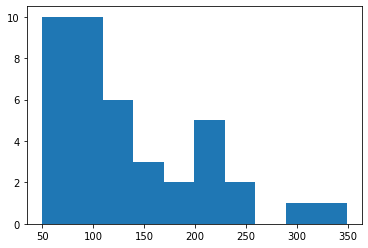

In [11]:
import matplotlib.pyplot as plt
# 히스토그램 그리기
plt.hist(survey["salary"])
#help(plt.hist)

(array([10., 10.,  6.,  3.,  2.,  5.,  2.,  0.,  1.,  1.]),
 array([ 50. ,  79.9, 109.8, 139.7, 169.6, 199.5, 229.4, 259.3, 289.2,
        319.1, 349. ]),
 <BarContainer object of 10 artists>)

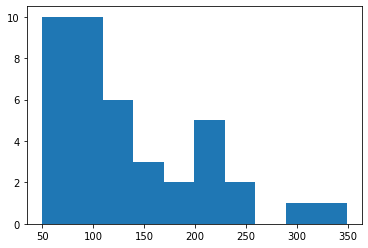

In [14]:
plt.hist(survey.salary)
# plt.hist(survey["salary"])와 동일한 결과

(<Figure size 540x180 with 1 Axes>, <Axes:>)

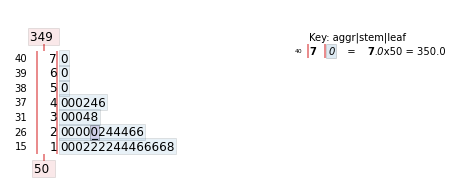

In [12]:
# 줄기-잎 그림 그리기
# pip install stemgraphic (in DOS prompt)
import stemgraphic
stemgraphic.stem_graphic(survey.salary, scale=50)

<AxesSubplot:xlabel='sex', ylabel='salary'>

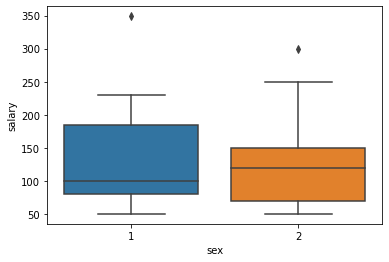

In [13]:
# 상자그림 그리기
import seaborn as sns
sns.boxplot(x="sex", y="salary", data=survey)

In [16]:
# 1.3 이변량 그래프
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# 데이터 읽기
co2 = pd.read_csv("c:/data/mva/co2.csv")
co2.head(2)

,Unnamed: 0,x
0,1,315.42
1,2,316.31


In [18]:
# 변수이름 지정하기
co2.columns = ["seq", "x"]
co2.head(2)

,seq,x
0,1,315.42
1,2,316.31


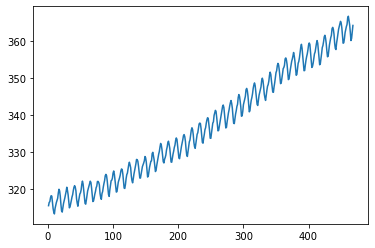

In [19]:
# 선그리기
plt.plot(co2.seq, co2.x)

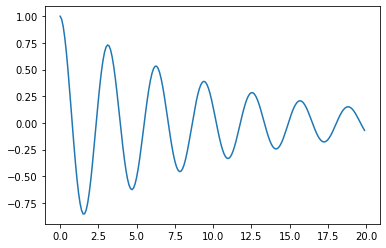

In [20]:
# plot of mathematical functions
x = np.arange(0, 20, 0.1)
y = np.exp(-x/10)*np.cos(2*x)
plt.plot(x, y)

In [21]:
# 데이터 읽기
USairpollution = pd.read_csv("c:/data/mva/USairpollution.csv")
USairpollution.head(3)

,state,SO2,temp,manu,popul,wind,precip,predays
0,Albany,46,47.6,44,116,8.8,33.36,135
1,Albuquerque,11,56.8,46,244,8.9,7.77,58
2,Atlanta,24,61.5,368,497,9.1,48.34,115


Text(0.5, 1.0, 'Bubble plot')

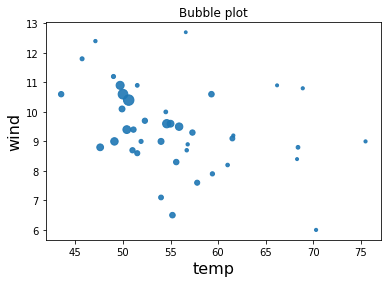

In [22]:
# 버블차트 그리기1
plt.scatter('temp', 'wind', s='SO2', alpha=0.9, data=USairpollution)
plt.xlabel("temp", size=16)
plt.ylabel("wind", size=16)
plt.title("Bubble plot")

In [23]:
# SO2 변숫값 * 5 (버블크기를 키우려는 목적)
USairpollution["SO2"] = USairpollution["SO2"] * 5

Text(0.5, 1.0, 'Bubble plot')

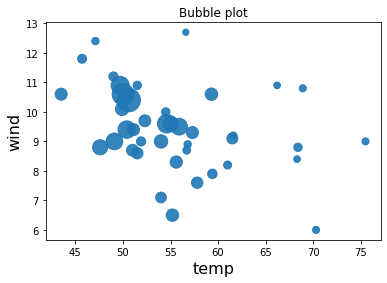

In [24]:
# 버블차트 그리기2
plt.scatter('temp', 'wind', s='SO2', alpha=0.9, data=USairpollution)
plt.xlabel("temp", size=16)
plt.ylabel("wind", size=16)
plt.title("Bubble plot")

In [25]:
#1.4 다차원 그래프
import pandas as pd
# 데이터 읽기
social = pd.read_csv("c:/data/mva/social.csv")

In [26]:
# (행의 수, 열의 수) 확인
social.shape

(25, 7)

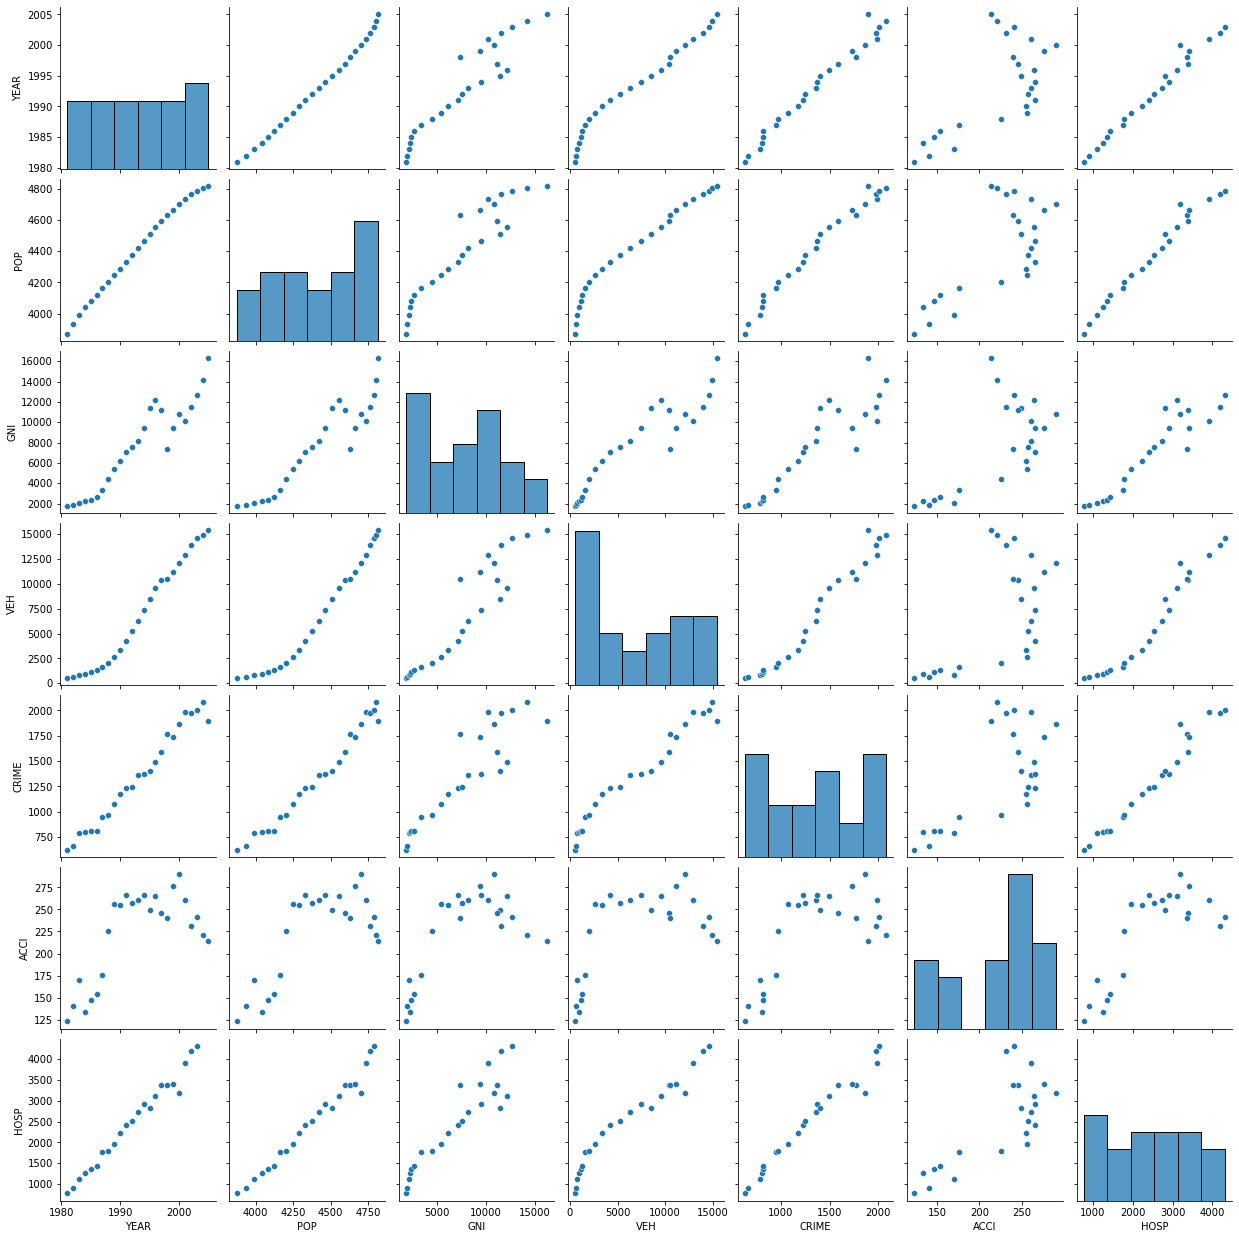

In [28]:
# seaborn을 이용하여 산점도행렬 그리기
import seaborn as sns
sns.pairplot(social)

In [29]:
# 상관계수 행렬 구하기(소수점 이하 3자리 반올림)
round(social.corr(), 3)

,YEAR,POP,GNI,VEH,CRIME,ACCI,HOSP
YEAR,1.000,0.996,0.948,0.985,0.989,0.680,0.991
POP,0.996,1.000,0.941,0.977,0.989,0.721,0.988
GNI,0.948,0.941,1.000,0.940,0.911,0.676,0.934
VEH,0.985,0.977,0.940,1.000,0.982,0.599,0.972
CRIME,0.989,0.989,0.911,0.982,1.000,0.683,0.983
ACCI,0.680,0.721,0.676,0.599,0.683,1.000,0.770
HOSP,0.991,0.988,0.934,0.972,0.983,0.770,1.000


In [30]:
#iris 산점도 행렬
import seaborn as sns
# seaborn에 내장된 iris 데이터 가져오기
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


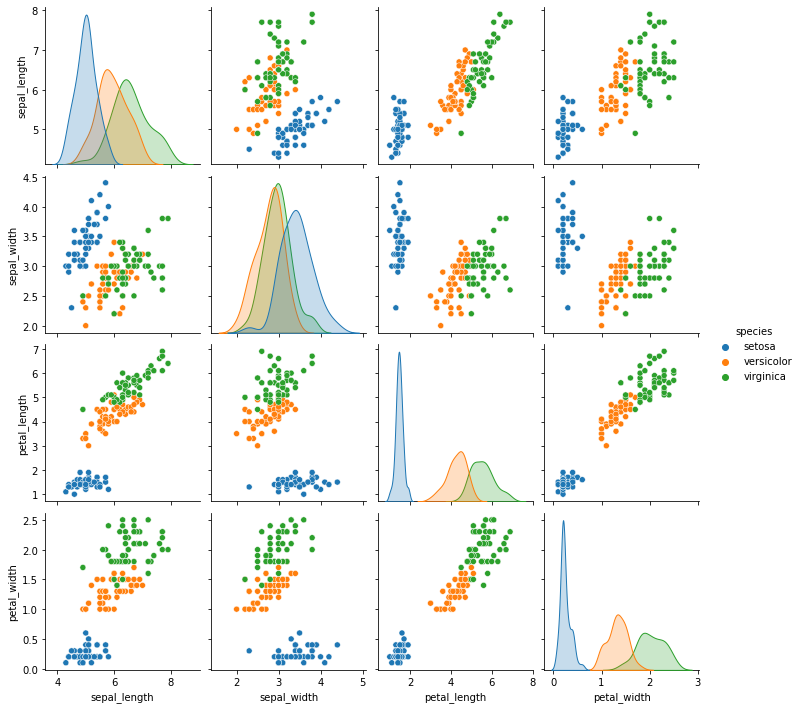

In [31]:
# species로 구분된 산점도행렬 그리기(대각선은 각 그룹별 분포)
sns.pairplot(iris, hue='species', height=2.5)